In [7]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [8]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

house price ( base : $1000 )

In [9]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [14]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

make model

In [76]:
from keras import *
from keras.layers import *
from keras.models import *

def build_model():
    model = models.Sequential()
    model.add( layers.Dense(64, activation=activations.relu, input_shape=(train_data.shape[1], ) ) )
    model.add( layers.Dense(64, activation=activations.relu))
    model.add( layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


K-fold

In [144]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

seed = 7
n_fold = 4
epochs_in = 500
eval_maes = []
trained_model = []
mae_history = []

# model = KerasClassifier(build_fn=build_model, epochs=150, batch_size=10, verbose=1)
kfold = KFold(n_splits=n_fold, shuffle=True, random_state=seed)
# results = cross_val_score(model, train_data, train_targets, cv=kfold)
# results

for train, validation in kfold.split(train_data, train_targets):
    model = build_model()
    hist = model.fit(train_data[train], train_targets[train], 
                     validation_data=(train_data[validation], train_targets[validation]),
                     epochs=epochs_in, batch_size=10)
    k_mae =  "%.4f" % (model.evaluate(train_data[validation], train_targets[validation])[1])
    
    trained_model.append(model)
    mae_history.append(hist.history['val_mean_absolute_error'])
    eval_maes.append(k_mae)
    
# 결과 출력
print("\n %.f fold eval_maes:" % n_fold, eval_maes)
print("model metrics_name: ", model.metrics_names)
print("mean mae :", np.asarray(eval_maes).astype(np.float).mean() )


Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 4s 12ms/step - loss: 518.5530 - mean_absolute_error: 20.4657 - val_loss: 368.2529 - val_mean_absolute_error: 17.5583
Epoch 2/500
303/303 [==============================] - 0s 211us/step - loss: 323.5158 - mean_absolute_error: 15.3737 - val_loss: 185.9560 - val_mean_absolute_error: 11.9603
Epoch 3/500
303/303 [==============================] - 0s 249us/step - loss: 145.3110 - mean_absolute_error: 9.5472 - val_loss: 66.2619 - val_mean_absolute_error: 6.7625
Epoch 4/500
303/303 [==============================] - 0s 195us/step - loss: 61.0506 - mean_absolute_error: 5.7614 - val_loss: 32.4372 - val_mean_absolute_error: 4.6267
Epoch 5/500
303/303 [==============================] - 0s 167us/step - loss: 37.6969 - mean_absolute_error: 4.3268 - val_loss: 21.6854 - val_mean_absolute_error: 3.6510
Epoch 6/500
303/303 [==============================] - 0s 203us/step - loss: 28.3498 - mean_absolute_

303/303 [==============================] - 0s 202us/step - loss: 6.7780 - mean_absolute_error: 1.8343 - val_loss: 10.1172 - val_mean_absolute_error: 2.3633
Epoch 50/500
303/303 [==============================] - 0s 237us/step - loss: 6.7622 - mean_absolute_error: 1.8174 - val_loss: 10.3287 - val_mean_absolute_error: 2.3776
Epoch 51/500
303/303 [==============================] - 0s 179us/step - loss: 6.5965 - mean_absolute_error: 1.8580 - val_loss: 9.7908 - val_mean_absolute_error: 2.2414
Epoch 52/500
303/303 [==============================] - 0s 237us/step - loss: 6.4412 - mean_absolute_error: 1.7964 - val_loss: 10.2149 - val_mean_absolute_error: 2.2911
Epoch 53/500
303/303 [==============================] - 0s 190us/step - loss: 6.5196 - mean_absolute_error: 1.7996 - val_loss: 10.1524 - val_mean_absolute_error: 2.2655
Epoch 54/500
303/303 [==============================] - 0s 233us/step - loss: 6.2064 - mean_absolute_error: 1.7648 - val_loss: 9.8993 - val_mean_absolute_error: 2.2839
E

Epoch 98/500
303/303 [==============================] - 0s 181us/step - loss: 4.1974 - mean_absolute_error: 1.4338 - val_loss: 9.9078 - val_mean_absolute_error: 2.2826
Epoch 99/500
303/303 [==============================] - 0s 170us/step - loss: 4.2977 - mean_absolute_error: 1.4240 - val_loss: 9.4450 - val_mean_absolute_error: 2.1835
Epoch 100/500
303/303 [==============================] - 0s 183us/step - loss: 4.2491 - mean_absolute_error: 1.4266 - val_loss: 9.6917 - val_mean_absolute_error: 2.1887
Epoch 101/500
303/303 [==============================] - 0s 179us/step - loss: 4.1479 - mean_absolute_error: 1.4300 - val_loss: 9.9148 - val_mean_absolute_error: 2.2623
Epoch 102/500
303/303 [==============================] - 0s 206us/step - loss: 4.0097 - mean_absolute_error: 1.3940 - val_loss: 10.3435 - val_mean_absolute_error: 2.3230
Epoch 103/500
303/303 [==============================] - 0s 186us/step - loss: 4.0581 - mean_absolute_error: 1.4510 - val_loss: 9.4460 - val_mean_absolute_e

303/303 [==============================] - 0s 194us/step - loss: 2.8119 - mean_absolute_error: 1.1617 - val_loss: 9.5776 - val_mean_absolute_error: 2.2495
Epoch 147/500
303/303 [==============================] - 0s 186us/step - loss: 2.7731 - mean_absolute_error: 1.1503 - val_loss: 10.4764 - val_mean_absolute_error: 2.4698
Epoch 148/500
303/303 [==============================] - 0s 157us/step - loss: 2.7944 - mean_absolute_error: 1.1585 - val_loss: 10.8703 - val_mean_absolute_error: 2.4457
Epoch 149/500
303/303 [==============================] - 0s 154us/step - loss: 2.7592 - mean_absolute_error: 1.1591 - val_loss: 10.8772 - val_mean_absolute_error: 2.5066
Epoch 150/500
303/303 [==============================] - 0s 185us/step - loss: 2.7511 - mean_absolute_error: 1.1549 - val_loss: 10.4116 - val_mean_absolute_error: 2.3642
Epoch 151/500
303/303 [==============================] - 0s 182us/step - loss: 2.5178 - mean_absolute_error: 1.1147 - val_loss: 11.5772 - val_mean_absolute_error: 2.

303/303 [==============================] - 0s 184us/step - loss: 2.0612 - mean_absolute_error: 1.0047 - val_loss: 10.7638 - val_mean_absolute_error: 2.4068
Epoch 195/500
303/303 [==============================] - 0s 171us/step - loss: 1.9644 - mean_absolute_error: 0.9747 - val_loss: 11.6996 - val_mean_absolute_error: 2.5792
Epoch 196/500
303/303 [==============================] - 0s 240us/step - loss: 1.8400 - mean_absolute_error: 0.9730 - val_loss: 10.9883 - val_mean_absolute_error: 2.3440
Epoch 197/500
303/303 [==============================] - 0s 215us/step - loss: 1.8415 - mean_absolute_error: 0.9584 - val_loss: 10.8184 - val_mean_absolute_error: 2.4062
Epoch 198/500
303/303 [==============================] - 0s 174us/step - loss: 1.9058 - mean_absolute_error: 0.9601 - val_loss: 10.5329 - val_mean_absolute_error: 2.4080
Epoch 199/500
303/303 [==============================] - 0s 211us/step - loss: 1.9226 - mean_absolute_error: 0.9700 - val_loss: 10.6427 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 182us/step - loss: 1.4504 - mean_absolute_error: 0.8568 - val_loss: 11.6131 - val_mean_absolute_error: 2.4923
Epoch 243/500
303/303 [==============================] - 0s 198us/step - loss: 1.3584 - mean_absolute_error: 0.8263 - val_loss: 11.0279 - val_mean_absolute_error: 2.3610
Epoch 244/500
303/303 [==============================] - 0s 170us/step - loss: 1.4029 - mean_absolute_error: 0.8697 - val_loss: 12.4729 - val_mean_absolute_error: 2.5141
Epoch 245/500
303/303 [==============================] - 0s 161us/step - loss: 1.3679 - mean_absolute_error: 0.8457 - val_loss: 11.5484 - val_mean_absolute_error: 2.4349
Epoch 246/500
303/303 [==============================] - 0s 165us/step - loss: 1.3702 - mean_absolute_error: 0.8586 - val_loss: 11.7697 - val_mean_absolute_error: 2.4685
Epoch 247/500
303/303 [==============================] - 0s 222us/step - loss: 1.4121 - mean_absolute_error: 0.8414 - val_loss: 11.4168 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 161us/step - loss: 1.0982 - mean_absolute_error: 0.7644 - val_loss: 12.3807 - val_mean_absolute_error: 2.5235
Epoch 291/500
303/303 [==============================] - 0s 196us/step - loss: 1.1120 - mean_absolute_error: 0.7549 - val_loss: 12.3756 - val_mean_absolute_error: 2.5528
Epoch 292/500
303/303 [==============================] - 0s 214us/step - loss: 1.0518 - mean_absolute_error: 0.7449 - val_loss: 12.5934 - val_mean_absolute_error: 2.5402
Epoch 293/500
303/303 [==============================] - 0s 182us/step - loss: 1.0895 - mean_absolute_error: 0.7626 - val_loss: 12.5343 - val_mean_absolute_error: 2.4958
Epoch 294/500
303/303 [==============================] - 0s 194us/step - loss: 1.1730 - mean_absolute_error: 0.7904 - val_loss: 12.2625 - val_mean_absolute_error: 2.4666
Epoch 295/500
303/303 [==============================] - 0s 201us/step - loss: 0.9713 - mean_absolute_error: 0.7015 - val_loss: 12.6532 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 161us/step - loss: 0.8250 - mean_absolute_error: 0.6759 - val_loss: 12.4326 - val_mean_absolute_error: 2.4996
Epoch 339/500
303/303 [==============================] - 0s 160us/step - loss: 0.7818 - mean_absolute_error: 0.6452 - val_loss: 12.9010 - val_mean_absolute_error: 2.5821
Epoch 340/500
303/303 [==============================] - 0s 180us/step - loss: 0.8560 - mean_absolute_error: 0.7080 - val_loss: 13.0213 - val_mean_absolute_error: 2.5930
Epoch 341/500
303/303 [==============================] - 0s 213us/step - loss: 0.8599 - mean_absolute_error: 0.6831 - val_loss: 13.2176 - val_mean_absolute_error: 2.6239
Epoch 342/500
303/303 [==============================] - 0s 168us/step - loss: 0.7884 - mean_absolute_error: 0.6442 - val_loss: 12.3858 - val_mean_absolute_error: 2.4872
Epoch 343/500
303/303 [==============================] - 0s 215us/step - loss: 0.7602 - mean_absolute_error: 0.6404 - val_loss: 12.5036 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 226us/step - loss: 0.7737 - mean_absolute_error: 0.6251 - val_loss: 12.6283 - val_mean_absolute_error: 2.5246
Epoch 387/500
303/303 [==============================] - 0s 185us/step - loss: 0.7107 - mean_absolute_error: 0.6059 - val_loss: 12.7770 - val_mean_absolute_error: 2.5907
Epoch 388/500
303/303 [==============================] - 0s 243us/step - loss: 0.7083 - mean_absolute_error: 0.6170 - val_loss: 12.6503 - val_mean_absolute_error: 2.5414
Epoch 389/500
303/303 [==============================] - 0s 215us/step - loss: 0.6821 - mean_absolute_error: 0.5845 - val_loss: 13.3221 - val_mean_absolute_error: 2.5468
Epoch 390/500
303/303 [==============================] - 0s 167us/step - loss: 0.6977 - mean_absolute_error: 0.5976 - val_loss: 13.8065 - val_mean_absolute_error: 2.7739
Epoch 391/500
303/303 [==============================] - 0s 162us/step - loss: 0.6631 - mean_absolute_error: 0.5689 - val_loss: 12.3114 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 191us/step - loss: 0.6097 - mean_absolute_error: 0.5798 - val_loss: 12.7568 - val_mean_absolute_error: 2.5694
Epoch 435/500
303/303 [==============================] - 0s 207us/step - loss: 0.5384 - mean_absolute_error: 0.5328 - val_loss: 12.9101 - val_mean_absolute_error: 2.6015
Epoch 436/500
303/303 [==============================] - 0s 182us/step - loss: 0.6049 - mean_absolute_error: 0.5909 - val_loss: 12.7512 - val_mean_absolute_error: 2.5506
Epoch 437/500
303/303 [==============================] - 0s 199us/step - loss: 0.5513 - mean_absolute_error: 0.5212 - val_loss: 14.0306 - val_mean_absolute_error: 2.6512
Epoch 438/500
303/303 [==============================] - 0s 195us/step - loss: 0.5865 - mean_absolute_error: 0.5749 - val_loss: 12.4161 - val_mean_absolute_error: 2.5317
Epoch 439/500
303/303 [==============================] - 0s 210us/step - loss: 0.6512 - mean_absolute_error: 0.5863 - val_loss: 12.5431 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 162us/step - loss: 0.4921 - mean_absolute_error: 0.5176 - val_loss: 14.3849 - val_mean_absolute_error: 2.7219
Epoch 483/500
303/303 [==============================] - 0s 222us/step - loss: 0.5257 - mean_absolute_error: 0.5459 - val_loss: 12.3336 - val_mean_absolute_error: 2.5405
Epoch 484/500
303/303 [==============================] - 0s 179us/step - loss: 0.5246 - mean_absolute_error: 0.5054 - val_loss: 12.9059 - val_mean_absolute_error: 2.5510
Epoch 485/500
303/303 [==============================] - 0s 158us/step - loss: 0.5399 - mean_absolute_error: 0.5435 - val_loss: 12.6162 - val_mean_absolute_error: 2.5457
Epoch 486/500
303/303 [==============================] - 0s 175us/step - loss: 0.5046 - mean_absolute_error: 0.5322 - val_loss: 11.9487 - val_mean_absolute_error: 2.4932
Epoch 487/500
303/303 [==============================] - 0s 201us/step - loss: 0.5089 - mean_absolute_error: 0.5367 - val_loss: 12.2111 - val_mean_absolute_error: 2

Epoch 30/500
303/303 [==============================] - 0s 182us/step - loss: 9.3831 - mean_absolute_error: 2.0974 - val_loss: 11.5285 - val_mean_absolute_error: 2.4676
Epoch 31/500
303/303 [==============================] - 0s 199us/step - loss: 9.4864 - mean_absolute_error: 2.1585 - val_loss: 11.5530 - val_mean_absolute_error: 2.4599
Epoch 32/500
303/303 [==============================] - 0s 229us/step - loss: 9.2524 - mean_absolute_error: 2.1193 - val_loss: 11.5009 - val_mean_absolute_error: 2.4336
Epoch 33/500
303/303 [==============================] - 0s 238us/step - loss: 9.2143 - mean_absolute_error: 2.1328 - val_loss: 11.3831 - val_mean_absolute_error: 2.4392
Epoch 34/500
303/303 [==============================] - 0s 190us/step - loss: 9.1370 - mean_absolute_error: 2.0755 - val_loss: 11.7317 - val_mean_absolute_error: 2.4993
Epoch 35/500
303/303 [==============================] - 0s 179us/step - loss: 8.8078 - mean_absolute_error: 2.0418 - val_loss: 11.3135 - val_mean_absolute_

303/303 [==============================] - 0s 171us/step - loss: 6.4037 - mean_absolute_error: 1.7339 - val_loss: 11.3756 - val_mean_absolute_error: 2.5394
Epoch 79/500
303/303 [==============================] - 0s 201us/step - loss: 6.3447 - mean_absolute_error: 1.7100 - val_loss: 9.3828 - val_mean_absolute_error: 2.2712
Epoch 80/500
303/303 [==============================] - 0s 187us/step - loss: 6.1870 - mean_absolute_error: 1.6921 - val_loss: 9.3600 - val_mean_absolute_error: 2.2501
Epoch 81/500
303/303 [==============================] - 0s 200us/step - loss: 6.3562 - mean_absolute_error: 1.7036 - val_loss: 10.1631 - val_mean_absolute_error: 2.3948
Epoch 82/500
303/303 [==============================] - 0s 217us/step - loss: 6.1814 - mean_absolute_error: 1.6978 - val_loss: 9.8958 - val_mean_absolute_error: 2.3504
Epoch 83/500
303/303 [==============================] - 0s 162us/step - loss: 6.1975 - mean_absolute_error: 1.6874 - val_loss: 9.5659 - val_mean_absolute_error: 2.3319
Epo

303/303 [==============================] - 0s 208us/step - loss: 4.7436 - mean_absolute_error: 1.4877 - val_loss: 9.1972 - val_mean_absolute_error: 2.3278
Epoch 127/500
303/303 [==============================] - 0s 178us/step - loss: 4.7267 - mean_absolute_error: 1.4375 - val_loss: 8.4235 - val_mean_absolute_error: 2.1961
Epoch 128/500
303/303 [==============================] - 0s 161us/step - loss: 4.5164 - mean_absolute_error: 1.4271 - val_loss: 9.3345 - val_mean_absolute_error: 2.2982
Epoch 129/500
303/303 [==============================] - 0s 201us/step - loss: 4.6343 - mean_absolute_error: 1.4627 - val_loss: 8.9813 - val_mean_absolute_error: 2.2848
Epoch 130/500
303/303 [==============================] - 0s 210us/step - loss: 4.5207 - mean_absolute_error: 1.4430 - val_loss: 8.6794 - val_mean_absolute_error: 2.2271
Epoch 131/500
303/303 [==============================] - 0s 199us/step - loss: 4.4831 - mean_absolute_error: 1.4458 - val_loss: 8.0704 - val_mean_absolute_error: 2.1211


303/303 [==============================] - 0s 226us/step - loss: 3.5070 - mean_absolute_error: 1.2766 - val_loss: 7.9682 - val_mean_absolute_error: 2.1614
Epoch 175/500
303/303 [==============================] - 0s 163us/step - loss: 3.4491 - mean_absolute_error: 1.2744 - val_loss: 7.9178 - val_mean_absolute_error: 2.1677
Epoch 176/500
303/303 [==============================] - 0s 161us/step - loss: 3.4483 - mean_absolute_error: 1.2711 - val_loss: 8.3798 - val_mean_absolute_error: 2.2510
Epoch 177/500
303/303 [==============================] - 0s 165us/step - loss: 3.5445 - mean_absolute_error: 1.2946 - val_loss: 8.3642 - val_mean_absolute_error: 2.2455
Epoch 178/500
303/303 [==============================] - 0s 154us/step - loss: 3.2599 - mean_absolute_error: 1.2426 - val_loss: 9.0263 - val_mean_absolute_error: 2.3164
Epoch 179/500
303/303 [==============================] - 0s 190us/step - loss: 3.3672 - mean_absolute_error: 1.2690 - val_loss: 8.4334 - val_mean_absolute_error: 2.2649


303/303 [==============================] - 0s 195us/step - loss: 2.4744 - mean_absolute_error: 1.0795 - val_loss: 8.7951 - val_mean_absolute_error: 2.2411
Epoch 223/500
303/303 [==============================] - 0s 183us/step - loss: 2.4379 - mean_absolute_error: 1.0921 - val_loss: 9.0379 - val_mean_absolute_error: 2.3373
Epoch 224/500
303/303 [==============================] - 0s 165us/step - loss: 2.5074 - mean_absolute_error: 1.1073 - val_loss: 8.3778 - val_mean_absolute_error: 2.1449
Epoch 225/500
303/303 [==============================] - 0s 162us/step - loss: 2.3673 - mean_absolute_error: 1.0877 - val_loss: 8.1789 - val_mean_absolute_error: 2.1468
Epoch 226/500
303/303 [==============================] - 0s 192us/step - loss: 2.4298 - mean_absolute_error: 1.1144 - val_loss: 8.6046 - val_mean_absolute_error: 2.2011
Epoch 227/500
303/303 [==============================] - 0s 185us/step - loss: 2.3463 - mean_absolute_error: 1.0751 - val_loss: 9.2641 - val_mean_absolute_error: 2.2712


303/303 [==============================] - 0s 194us/step - loss: 1.9128 - mean_absolute_error: 0.9767 - val_loss: 8.6411 - val_mean_absolute_error: 2.2392
Epoch 271/500
303/303 [==============================] - 0s 182us/step - loss: 1.7946 - mean_absolute_error: 0.9519 - val_loss: 9.2857 - val_mean_absolute_error: 2.2880
Epoch 272/500
303/303 [==============================] - 0s 213us/step - loss: 1.8709 - mean_absolute_error: 0.9350 - val_loss: 10.2248 - val_mean_absolute_error: 2.4269
Epoch 273/500
303/303 [==============================] - 0s 170us/step - loss: 1.9853 - mean_absolute_error: 0.9672 - val_loss: 9.7743 - val_mean_absolute_error: 2.3733
Epoch 274/500
303/303 [==============================] - 0s 154us/step - loss: 1.7541 - mean_absolute_error: 0.9288 - val_loss: 9.3099 - val_mean_absolute_error: 2.2398
Epoch 275/500
303/303 [==============================] - 0s 221us/step - loss: 1.7383 - mean_absolute_error: 0.9234 - val_loss: 8.1669 - val_mean_absolute_error: 2.1457

303/303 [==============================] - 0s 165us/step - loss: 1.3617 - mean_absolute_error: 0.8306 - val_loss: 9.4592 - val_mean_absolute_error: 2.2770
Epoch 319/500
303/303 [==============================] - 0s 157us/step - loss: 1.4884 - mean_absolute_error: 0.8700 - val_loss: 9.4722 - val_mean_absolute_error: 2.2975
Epoch 320/500
303/303 [==============================] - 0s 161us/step - loss: 1.4577 - mean_absolute_error: 0.8745 - val_loss: 9.8681 - val_mean_absolute_error: 2.3125
Epoch 321/500
303/303 [==============================] - 0s 214us/step - loss: 1.4098 - mean_absolute_error: 0.8702 - val_loss: 10.1470 - val_mean_absolute_error: 2.3995
Epoch 322/500
303/303 [==============================] - 0s 170us/step - loss: 1.3773 - mean_absolute_error: 0.8610 - val_loss: 9.9068 - val_mean_absolute_error: 2.3540
Epoch 323/500
303/303 [==============================] - 0s 169us/step - loss: 1.4300 - mean_absolute_error: 0.8243 - val_loss: 11.0513 - val_mean_absolute_error: 2.506

303/303 [==============================] - 0s 161us/step - loss: 1.0833 - mean_absolute_error: 0.7340 - val_loss: 9.4022 - val_mean_absolute_error: 2.2555
Epoch 367/500
303/303 [==============================] - 0s 200us/step - loss: 1.0936 - mean_absolute_error: 0.7808 - val_loss: 10.0106 - val_mean_absolute_error: 2.3384
Epoch 368/500
303/303 [==============================] - 0s 163us/step - loss: 1.1686 - mean_absolute_error: 0.7376 - val_loss: 9.8597 - val_mean_absolute_error: 2.2939
Epoch 369/500
303/303 [==============================] - 0s 194us/step - loss: 1.0112 - mean_absolute_error: 0.7100 - val_loss: 9.0429 - val_mean_absolute_error: 2.1614
Epoch 370/500
303/303 [==============================] - 0s 170us/step - loss: 1.2086 - mean_absolute_error: 0.7955 - val_loss: 10.2209 - val_mean_absolute_error: 2.3114
Epoch 371/500
303/303 [==============================] - 0s 200us/step - loss: 1.0798 - mean_absolute_error: 0.7439 - val_loss: 11.3778 - val_mean_absolute_error: 2.52

303/303 [==============================] - 0s 173us/step - loss: 1.0034 - mean_absolute_error: 0.7244 - val_loss: 11.0332 - val_mean_absolute_error: 2.3952
Epoch 415/500
303/303 [==============================] - 0s 203us/step - loss: 0.9247 - mean_absolute_error: 0.6783 - val_loss: 10.5205 - val_mean_absolute_error: 2.2900
Epoch 416/500
303/303 [==============================] - 0s 197us/step - loss: 0.8827 - mean_absolute_error: 0.6638 - val_loss: 13.5457 - val_mean_absolute_error: 2.5893
Epoch 417/500
303/303 [==============================] - 0s 180us/step - loss: 0.9723 - mean_absolute_error: 0.6910 - val_loss: 9.6848 - val_mean_absolute_error: 2.2525
Epoch 418/500
303/303 [==============================] - 0s 170us/step - loss: 1.0170 - mean_absolute_error: 0.7196 - val_loss: 9.8736 - val_mean_absolute_error: 2.2295
Epoch 419/500
303/303 [==============================] - 0s 206us/step - loss: 0.7889 - mean_absolute_error: 0.6300 - val_loss: 11.3449 - val_mean_absolute_error: 2.3

303/303 [==============================] - 0s 247us/step - loss: 0.7763 - mean_absolute_error: 0.6349 - val_loss: 9.7066 - val_mean_absolute_error: 2.2384
Epoch 463/500
303/303 [==============================] - 0s 186us/step - loss: 0.7523 - mean_absolute_error: 0.6111 - val_loss: 11.1811 - val_mean_absolute_error: 2.3974
Epoch 464/500
303/303 [==============================] - 0s 194us/step - loss: 0.8915 - mean_absolute_error: 0.6898 - val_loss: 10.9534 - val_mean_absolute_error: 2.3351
Epoch 465/500
303/303 [==============================] - 0s 201us/step - loss: 0.7404 - mean_absolute_error: 0.6039 - val_loss: 11.7003 - val_mean_absolute_error: 2.3385
Epoch 466/500
303/303 [==============================] - 0s 209us/step - loss: 0.8792 - mean_absolute_error: 0.6601 - val_loss: 11.9716 - val_mean_absolute_error: 2.3723
Epoch 467/500
303/303 [==============================] - 0s 174us/step - loss: 0.8711 - mean_absolute_error: 0.6836 - val_loss: 13.6583 - val_mean_absolute_error: 2.

Epoch 10/500
303/303 [==============================] - 0s 210us/step - loss: 18.0831 - mean_absolute_error: 2.9183 - val_loss: 26.1398 - val_mean_absolute_error: 3.1210
Epoch 11/500
303/303 [==============================] - 0s 174us/step - loss: 17.2439 - mean_absolute_error: 2.8499 - val_loss: 23.9069 - val_mean_absolute_error: 3.0608
Epoch 12/500
303/303 [==============================] - 0s 180us/step - loss: 15.9097 - mean_absolute_error: 2.7421 - val_loss: 23.9966 - val_mean_absolute_error: 3.2360
Epoch 13/500
303/303 [==============================] - 0s 234us/step - loss: 15.1942 - mean_absolute_error: 2.6395 - val_loss: 19.9803 - val_mean_absolute_error: 2.7947
Epoch 14/500
303/303 [==============================] - 0s 190us/step - loss: 14.4121 - mean_absolute_error: 2.5800 - val_loss: 18.7602 - val_mean_absolute_error: 2.7329
Epoch 15/500
303/303 [==============================] - 0s 169us/step - loss: 13.4606 - mean_absolute_error: 2.5176 - val_loss: 17.8614 - val_mean_abs

303/303 [==============================] - 0s 189us/step - loss: 6.7923 - mean_absolute_error: 1.8381 - val_loss: 11.4224 - val_mean_absolute_error: 2.2767
Epoch 59/500
303/303 [==============================] - 0s 169us/step - loss: 6.8857 - mean_absolute_error: 1.7974 - val_loss: 10.2487 - val_mean_absolute_error: 2.1628
Epoch 60/500
303/303 [==============================] - 0s 193us/step - loss: 6.7637 - mean_absolute_error: 1.8516 - val_loss: 10.5497 - val_mean_absolute_error: 2.1033
Epoch 61/500
303/303 [==============================] - 0s 195us/step - loss: 6.6709 - mean_absolute_error: 1.8055 - val_loss: 10.9990 - val_mean_absolute_error: 2.1430
Epoch 62/500
303/303 [==============================] - 0s 221us/step - loss: 6.5876 - mean_absolute_error: 1.8221 - val_loss: 11.0148 - val_mean_absolute_error: 2.1810
Epoch 63/500
303/303 [==============================] - 0s 209us/step - loss: 6.6029 - mean_absolute_error: 1.7878 - val_loss: 10.5124 - val_mean_absolute_error: 2.1163

303/303 [==============================] - 0s 167us/step - loss: 4.8238 - mean_absolute_error: 1.5411 - val_loss: 9.2455 - val_mean_absolute_error: 2.0497
Epoch 107/500
303/303 [==============================] - 0s 157us/step - loss: 4.7549 - mean_absolute_error: 1.5131 - val_loss: 8.9987 - val_mean_absolute_error: 1.9817
Epoch 108/500
303/303 [==============================] - 0s 222us/step - loss: 4.7425 - mean_absolute_error: 1.5255 - val_loss: 9.5856 - val_mean_absolute_error: 2.0529
Epoch 109/500
303/303 [==============================] - 0s 161us/step - loss: 4.7545 - mean_absolute_error: 1.5208 - val_loss: 10.1198 - val_mean_absolute_error: 2.1003
Epoch 110/500
303/303 [==============================] - 0s 184us/step - loss: 4.4272 - mean_absolute_error: 1.4695 - val_loss: 11.1150 - val_mean_absolute_error: 2.1882
Epoch 111/500
303/303 [==============================] - 0s 216us/step - loss: 4.4786 - mean_absolute_error: 1.4376 - val_loss: 9.8000 - val_mean_absolute_error: 2.100

303/303 [==============================] - 0s 176us/step - loss: 3.2153 - mean_absolute_error: 1.2649 - val_loss: 9.6648 - val_mean_absolute_error: 2.0947
Epoch 155/500
303/303 [==============================] - 0s 180us/step - loss: 3.2478 - mean_absolute_error: 1.2363 - val_loss: 9.8473 - val_mean_absolute_error: 2.1591
Epoch 156/500
303/303 [==============================] - 0s 171us/step - loss: 3.2470 - mean_absolute_error: 1.2678 - val_loss: 9.3662 - val_mean_absolute_error: 2.0241
Epoch 157/500
303/303 [==============================] - 0s 223us/step - loss: 3.0509 - mean_absolute_error: 1.2079 - val_loss: 9.2544 - val_mean_absolute_error: 2.0199
Epoch 158/500
303/303 [==============================] - 0s 203us/step - loss: 3.3030 - mean_absolute_error: 1.2398 - val_loss: 8.6345 - val_mean_absolute_error: 1.9697
Epoch 159/500
303/303 [==============================] - 0s 189us/step - loss: 3.2658 - mean_absolute_error: 1.2241 - val_loss: 9.6795 - val_mean_absolute_error: 2.1125


303/303 [==============================] - 0s 177us/step - loss: 2.3260 - mean_absolute_error: 1.0091 - val_loss: 9.9098 - val_mean_absolute_error: 2.2074
Epoch 203/500
303/303 [==============================] - 0s 206us/step - loss: 2.1734 - mean_absolute_error: 1.0175 - val_loss: 8.8040 - val_mean_absolute_error: 1.9934
Epoch 204/500
303/303 [==============================] - 0s 168us/step - loss: 2.2506 - mean_absolute_error: 1.0203 - val_loss: 9.1261 - val_mean_absolute_error: 2.0245
Epoch 205/500
303/303 [==============================] - 0s 177us/step - loss: 2.2811 - mean_absolute_error: 1.0496 - val_loss: 9.6332 - val_mean_absolute_error: 2.1012
Epoch 206/500
303/303 [==============================] - 0s 177us/step - loss: 2.2297 - mean_absolute_error: 1.0067 - val_loss: 11.3861 - val_mean_absolute_error: 2.3249
Epoch 207/500
303/303 [==============================] - 0s 186us/step - loss: 2.0666 - mean_absolute_error: 0.9986 - val_loss: 8.4078 - val_mean_absolute_error: 1.9711

303/303 [==============================] - 0s 187us/step - loss: 1.5816 - mean_absolute_error: 0.8546 - val_loss: 9.4153 - val_mean_absolute_error: 2.0774
Epoch 251/500
303/303 [==============================] - 0s 236us/step - loss: 1.6152 - mean_absolute_error: 0.9041 - val_loss: 9.9642 - val_mean_absolute_error: 2.1667
Epoch 252/500
303/303 [==============================] - 0s 184us/step - loss: 1.6624 - mean_absolute_error: 0.9051 - val_loss: 9.8502 - val_mean_absolute_error: 2.1455
Epoch 253/500
303/303 [==============================] - 0s 184us/step - loss: 1.6837 - mean_absolute_error: 0.9206 - val_loss: 9.3029 - val_mean_absolute_error: 2.1279
Epoch 254/500
303/303 [==============================] - 0s 181us/step - loss: 1.5494 - mean_absolute_error: 0.8739 - val_loss: 9.0971 - val_mean_absolute_error: 2.0608
Epoch 255/500
303/303 [==============================] - 0s 231us/step - loss: 1.5647 - mean_absolute_error: 0.8936 - val_loss: 8.8559 - val_mean_absolute_error: 2.0443


303/303 [==============================] - 0s 207us/step - loss: 1.2714 - mean_absolute_error: 0.7950 - val_loss: 9.2962 - val_mean_absolute_error: 2.0690
Epoch 299/500
303/303 [==============================] - 0s 158us/step - loss: 1.2542 - mean_absolute_error: 0.7624 - val_loss: 9.0691 - val_mean_absolute_error: 2.0633
Epoch 300/500
303/303 [==============================] - 0s 214us/step - loss: 1.3093 - mean_absolute_error: 0.8136 - val_loss: 9.4890 - val_mean_absolute_error: 2.1097
Epoch 301/500
303/303 [==============================] - 0s 171us/step - loss: 1.2329 - mean_absolute_error: 0.7791 - val_loss: 9.2800 - val_mean_absolute_error: 2.0818
Epoch 302/500
303/303 [==============================] - 0s 193us/step - loss: 1.2511 - mean_absolute_error: 0.7992 - val_loss: 10.1550 - val_mean_absolute_error: 2.2654
Epoch 303/500
303/303 [==============================] - 0s 212us/step - loss: 1.2049 - mean_absolute_error: 0.7348 - val_loss: 10.5014 - val_mean_absolute_error: 2.204

303/303 [==============================] - 0s 209us/step - loss: 0.9481 - mean_absolute_error: 0.6737 - val_loss: 10.1220 - val_mean_absolute_error: 2.2189
Epoch 347/500
303/303 [==============================] - 0s 210us/step - loss: 1.0107 - mean_absolute_error: 0.7036 - val_loss: 9.1878 - val_mean_absolute_error: 2.0837
Epoch 348/500
303/303 [==============================] - 0s 219us/step - loss: 0.9296 - mean_absolute_error: 0.6480 - val_loss: 8.6839 - val_mean_absolute_error: 2.0095
Epoch 349/500
303/303 [==============================] - 0s 214us/step - loss: 0.9913 - mean_absolute_error: 0.7139 - val_loss: 9.5901 - val_mean_absolute_error: 2.1044
Epoch 350/500
303/303 [==============================] - 0s 251us/step - loss: 0.9757 - mean_absolute_error: 0.6633 - val_loss: 9.5148 - val_mean_absolute_error: 2.0955
Epoch 351/500
303/303 [==============================] - 0s 177us/step - loss: 1.0326 - mean_absolute_error: 0.7025 - val_loss: 10.0054 - val_mean_absolute_error: 2.154

303/303 [==============================] - 0s 176us/step - loss: 0.8553 - mean_absolute_error: 0.6592 - val_loss: 9.8476 - val_mean_absolute_error: 2.1483
Epoch 395/500
303/303 [==============================] - 0s 217us/step - loss: 0.8767 - mean_absolute_error: 0.6302 - val_loss: 9.5420 - val_mean_absolute_error: 2.1005
Epoch 396/500
303/303 [==============================] - 0s 168us/step - loss: 0.8450 - mean_absolute_error: 0.6282 - val_loss: 9.3287 - val_mean_absolute_error: 2.0597
Epoch 397/500
303/303 [==============================] - 0s 201us/step - loss: 0.7764 - mean_absolute_error: 0.6149 - val_loss: 9.6730 - val_mean_absolute_error: 2.1166
Epoch 398/500
303/303 [==============================] - 0s 204us/step - loss: 0.8399 - mean_absolute_error: 0.6539 - val_loss: 10.5901 - val_mean_absolute_error: 2.2233
Epoch 399/500
303/303 [==============================] - 0s 176us/step - loss: 0.8034 - mean_absolute_error: 0.6355 - val_loss: 9.9090 - val_mean_absolute_error: 2.1938

303/303 [==============================] - 0s 169us/step - loss: 0.7445 - mean_absolute_error: 0.6126 - val_loss: 10.7203 - val_mean_absolute_error: 2.2071
Epoch 443/500
303/303 [==============================] - 0s 191us/step - loss: 0.6985 - mean_absolute_error: 0.5962 - val_loss: 9.9343 - val_mean_absolute_error: 2.1258
Epoch 444/500
303/303 [==============================] - 0s 224us/step - loss: 0.6734 - mean_absolute_error: 0.5741 - val_loss: 10.7026 - val_mean_absolute_error: 2.2466
Epoch 445/500
303/303 [==============================] - 0s 184us/step - loss: 0.6408 - mean_absolute_error: 0.5545 - val_loss: 10.3106 - val_mean_absolute_error: 2.1618
Epoch 446/500
303/303 [==============================] - 0s 201us/step - loss: 0.6634 - mean_absolute_error: 0.5892 - val_loss: 9.9063 - val_mean_absolute_error: 2.1402
Epoch 447/500
303/303 [==============================] - 0s 201us/step - loss: 0.7855 - mean_absolute_error: 0.6267 - val_loss: 9.1263 - val_mean_absolute_error: 2.09

303/303 [==============================] - 0s 203us/step - loss: 0.6445 - mean_absolute_error: 0.5860 - val_loss: 11.3477 - val_mean_absolute_error: 2.2310
Epoch 491/500
303/303 [==============================] - 0s 257us/step - loss: 0.5883 - mean_absolute_error: 0.5759 - val_loss: 11.1034 - val_mean_absolute_error: 2.3339
Epoch 492/500
303/303 [==============================] - 0s 193us/step - loss: 0.6049 - mean_absolute_error: 0.5739 - val_loss: 11.2826 - val_mean_absolute_error: 2.3858
Epoch 493/500
303/303 [==============================] - 0s 178us/step - loss: 0.6031 - mean_absolute_error: 0.5404 - val_loss: 11.8431 - val_mean_absolute_error: 2.4016
Epoch 494/500
303/303 [==============================] - 0s 189us/step - loss: 0.6381 - mean_absolute_error: 0.5737 - val_loss: 9.3456 - val_mean_absolute_error: 2.1127
Epoch 495/500
303/303 [==============================] - 0s 205us/step - loss: 0.5892 - mean_absolute_error: 0.5457 - val_loss: 10.6783 - val_mean_absolute_error: 2.

Epoch 38/500
303/303 [==============================] - 0s 197us/step - loss: 6.6789 - mean_absolute_error: 1.8218 - val_loss: 14.9342 - val_mean_absolute_error: 2.5107
Epoch 39/500
303/303 [==============================] - 0s 175us/step - loss: 6.7059 - mean_absolute_error: 1.7997 - val_loss: 15.2075 - val_mean_absolute_error: 2.7965
Epoch 40/500
303/303 [==============================] - 0s 205us/step - loss: 6.7333 - mean_absolute_error: 1.8670 - val_loss: 14.3964 - val_mean_absolute_error: 2.5207
Epoch 41/500
303/303 [==============================] - 0s 239us/step - loss: 6.7055 - mean_absolute_error: 1.8094 - val_loss: 14.5712 - val_mean_absolute_error: 2.6445
Epoch 42/500
303/303 [==============================] - 0s 197us/step - loss: 6.3474 - mean_absolute_error: 1.7917 - val_loss: 14.4827 - val_mean_absolute_error: 2.5291
Epoch 43/500
303/303 [==============================] - 0s 171us/step - loss: 6.5249 - mean_absolute_error: 1.7799 - val_loss: 14.1511 - val_mean_absolute_

303/303 [==============================] - 0s 191us/step - loss: 4.2899 - mean_absolute_error: 1.4639 - val_loss: 14.5015 - val_mean_absolute_error: 2.6835
Epoch 87/500
303/303 [==============================] - 0s 183us/step - loss: 4.2551 - mean_absolute_error: 1.5046 - val_loss: 14.2081 - val_mean_absolute_error: 2.7229
Epoch 88/500
303/303 [==============================] - 0s 201us/step - loss: 4.0132 - mean_absolute_error: 1.4567 - val_loss: 15.5656 - val_mean_absolute_error: 2.9172
Epoch 89/500
303/303 [==============================] - 0s 192us/step - loss: 4.1980 - mean_absolute_error: 1.4680 - val_loss: 14.1679 - val_mean_absolute_error: 2.7506
Epoch 90/500
303/303 [==============================] - 0s 198us/step - loss: 4.2701 - mean_absolute_error: 1.4792 - val_loss: 14.1890 - val_mean_absolute_error: 2.7111
Epoch 91/500
303/303 [==============================] - 0s 228us/step - loss: 4.0782 - mean_absolute_error: 1.4367 - val_loss: 13.6509 - val_mean_absolute_error: 2.5895

303/303 [==============================] - 0s 180us/step - loss: 2.7870 - mean_absolute_error: 1.2166 - val_loss: 14.2731 - val_mean_absolute_error: 2.7054
Epoch 135/500
303/303 [==============================] - 0s 184us/step - loss: 2.7406 - mean_absolute_error: 1.1999 - val_loss: 13.9416 - val_mean_absolute_error: 2.6415
Epoch 136/500
303/303 [==============================] - 0s 186us/step - loss: 2.6067 - mean_absolute_error: 1.1830 - val_loss: 16.2984 - val_mean_absolute_error: 2.9719
Epoch 137/500
303/303 [==============================] - 0s 191us/step - loss: 2.8086 - mean_absolute_error: 1.2169 - val_loss: 14.6878 - val_mean_absolute_error: 2.6961
Epoch 138/500
303/303 [==============================] - 0s 225us/step - loss: 2.6409 - mean_absolute_error: 1.1933 - val_loss: 15.3249 - val_mean_absolute_error: 2.7803
Epoch 139/500
303/303 [==============================] - 0s 214us/step - loss: 2.7038 - mean_absolute_error: 1.1727 - val_loss: 14.6917 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 184us/step - loss: 1.7905 - mean_absolute_error: 0.9915 - val_loss: 17.0827 - val_mean_absolute_error: 3.0378
Epoch 183/500
303/303 [==============================] - 0s 165us/step - loss: 1.9724 - mean_absolute_error: 1.0026 - val_loss: 15.8668 - val_mean_absolute_error: 2.8663
Epoch 184/500
303/303 [==============================] - 0s 192us/step - loss: 1.7940 - mean_absolute_error: 0.9720 - val_loss: 17.6214 - val_mean_absolute_error: 3.1067
Epoch 185/500
303/303 [==============================] - 0s 197us/step - loss: 1.8822 - mean_absolute_error: 0.9726 - val_loss: 16.0033 - val_mean_absolute_error: 2.9360
Epoch 186/500
303/303 [==============================] - 0s 154us/step - loss: 1.8133 - mean_absolute_error: 0.9707 - val_loss: 14.9913 - val_mean_absolute_error: 2.7229
Epoch 187/500
303/303 [==============================] - 0s 227us/step - loss: 1.7575 - mean_absolute_error: 0.9373 - val_loss: 15.6798 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 183us/step - loss: 1.4823 - mean_absolute_error: 0.8416 - val_loss: 16.9622 - val_mean_absolute_error: 2.9858
Epoch 231/500
303/303 [==============================] - 0s 166us/step - loss: 1.4941 - mean_absolute_error: 0.8792 - val_loss: 18.0040 - val_mean_absolute_error: 3.1369
Epoch 232/500
303/303 [==============================] - 0s 185us/step - loss: 1.3448 - mean_absolute_error: 0.8393 - val_loss: 16.4222 - val_mean_absolute_error: 2.8922
Epoch 233/500
303/303 [==============================] - 0s 175us/step - loss: 1.3827 - mean_absolute_error: 0.8581 - val_loss: 17.9406 - val_mean_absolute_error: 3.0357
Epoch 234/500
303/303 [==============================] - 0s 189us/step - loss: 1.3801 - mean_absolute_error: 0.8402 - val_loss: 17.0159 - val_mean_absolute_error: 2.9590
Epoch 235/500
303/303 [==============================] - 0s 208us/step - loss: 1.4188 - mean_absolute_error: 0.8130 - val_loss: 16.8665 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 181us/step - loss: 1.1300 - mean_absolute_error: 0.7617 - val_loss: 17.5044 - val_mean_absolute_error: 2.9949
Epoch 279/500
303/303 [==============================] - 0s 185us/step - loss: 1.2851 - mean_absolute_error: 0.7711 - val_loss: 17.7424 - val_mean_absolute_error: 3.0357
Epoch 280/500
303/303 [==============================] - 0s 197us/step - loss: 1.1666 - mean_absolute_error: 0.7579 - val_loss: 17.5845 - val_mean_absolute_error: 2.9924
Epoch 281/500
303/303 [==============================] - 0s 168us/step - loss: 1.1988 - mean_absolute_error: 0.7491 - val_loss: 17.4669 - val_mean_absolute_error: 2.9773
Epoch 282/500
303/303 [==============================] - 0s 197us/step - loss: 1.1467 - mean_absolute_error: 0.7494 - val_loss: 19.3865 - val_mean_absolute_error: 3.1905
Epoch 283/500
303/303 [==============================] - 0s 195us/step - loss: 1.2090 - mean_absolute_error: 0.7834 - val_loss: 17.1658 - val_mean_absolute_error: 2

303/303 [==============================] - 0s 187us/step - loss: 0.9138 - mean_absolute_error: 0.6853 - val_loss: 19.2225 - val_mean_absolute_error: 3.0945
Epoch 327/500
303/303 [==============================] - 0s 184us/step - loss: 0.9944 - mean_absolute_error: 0.7021 - val_loss: 18.7974 - val_mean_absolute_error: 3.0362
Epoch 328/500
303/303 [==============================] - 0s 188us/step - loss: 0.9371 - mean_absolute_error: 0.6709 - val_loss: 20.3429 - val_mean_absolute_error: 3.2252
Epoch 329/500
303/303 [==============================] - 0s 209us/step - loss: 0.9377 - mean_absolute_error: 0.6831 - val_loss: 20.9368 - val_mean_absolute_error: 3.2394
Epoch 330/500
303/303 [==============================] - 0s 189us/step - loss: 0.9090 - mean_absolute_error: 0.6483 - val_loss: 19.6526 - val_mean_absolute_error: 3.1251
Epoch 331/500
303/303 [==============================] - 0s 177us/step - loss: 0.9447 - mean_absolute_error: 0.6892 - val_loss: 18.8398 - val_mean_absolute_error: 3

303/303 [==============================] - 0s 207us/step - loss: 0.8541 - mean_absolute_error: 0.6313 - val_loss: 20.2649 - val_mean_absolute_error: 3.1558
Epoch 375/500
303/303 [==============================] - 0s 190us/step - loss: 0.8068 - mean_absolute_error: 0.6338 - val_loss: 20.3398 - val_mean_absolute_error: 3.1721
Epoch 376/500
303/303 [==============================] - 0s 174us/step - loss: 0.8395 - mean_absolute_error: 0.6314 - val_loss: 20.1555 - val_mean_absolute_error: 3.1381
Epoch 377/500
303/303 [==============================] - 0s 238us/step - loss: 0.7996 - mean_absolute_error: 0.6327 - val_loss: 20.4627 - val_mean_absolute_error: 3.1611
Epoch 378/500
303/303 [==============================] - 0s 194us/step - loss: 0.8322 - mean_absolute_error: 0.6497 - val_loss: 22.7621 - val_mean_absolute_error: 3.4440
Epoch 379/500
303/303 [==============================] - 0s 168us/step - loss: 0.7914 - mean_absolute_error: 0.6432 - val_loss: 20.1485 - val_mean_absolute_error: 3

303/303 [==============================] - 0s 212us/step - loss: 0.7549 - mean_absolute_error: 0.6205 - val_loss: 20.8075 - val_mean_absolute_error: 3.1387
Epoch 423/500
303/303 [==============================] - 0s 233us/step - loss: 0.6982 - mean_absolute_error: 0.5972 - val_loss: 21.3578 - val_mean_absolute_error: 3.2171
Epoch 424/500
303/303 [==============================] - 0s 178us/step - loss: 0.7578 - mean_absolute_error: 0.5998 - val_loss: 21.0008 - val_mean_absolute_error: 3.1739
Epoch 425/500
303/303 [==============================] - 0s 179us/step - loss: 0.7619 - mean_absolute_error: 0.6204 - val_loss: 21.3424 - val_mean_absolute_error: 3.1573
Epoch 426/500
303/303 [==============================] - 0s 180us/step - loss: 0.7234 - mean_absolute_error: 0.5855 - val_loss: 21.1267 - val_mean_absolute_error: 3.1613
Epoch 427/500
303/303 [==============================] - 0s 169us/step - loss: 0.6696 - mean_absolute_error: 0.5641 - val_loss: 21.8548 - val_mean_absolute_error: 3

303/303 [==============================] - 0s 200us/step - loss: 0.6637 - mean_absolute_error: 0.5667 - val_loss: 23.8306 - val_mean_absolute_error: 3.3397
Epoch 471/500
303/303 [==============================] - 0s 147us/step - loss: 0.6555 - mean_absolute_error: 0.5770 - val_loss: 22.9600 - val_mean_absolute_error: 3.2990
Epoch 472/500
303/303 [==============================] - 0s 188us/step - loss: 0.6649 - mean_absolute_error: 0.5763 - val_loss: 22.5838 - val_mean_absolute_error: 3.2471
Epoch 473/500
303/303 [==============================] - 0s 190us/step - loss: 0.6565 - mean_absolute_error: 0.5757 - val_loss: 22.1364 - val_mean_absolute_error: 3.2257
Epoch 474/500
303/303 [==============================] - 0s 258us/step - loss: 0.5466 - mean_absolute_error: 0.5294 - val_loss: 22.2328 - val_mean_absolute_error: 3.2061
Epoch 475/500
303/303 [==============================] - 0s 178us/step - loss: 0.5589 - mean_absolute_error: 0.5340 - val_loss: 22.7024 - val_mean_absolute_error: 3

In [149]:
average_mae_history = [ np.mean([x[i] for x in mae_history]) for i in range(epochs_in) ]

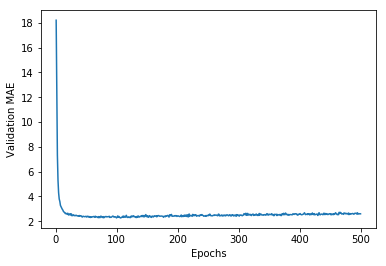

In [150]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1 ), average_mae_history )
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

make last model

In [151]:
model = build_model()
model.fit(train_data, train_targets,
         epochs=80, batch_size=16, verbose=0 )
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

102/102 [==============================] - 1s 14ms/step


2.6397709098516726